In [14]:
import pandas as pd
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

def read_file(file):
    """Read a single file and return a dataframe"""
    return pd.read_csv(file, skipinitialspace=True)

In [15]:
df_options = read_file("../models/predictions/all_predictions.csv")
df_options = df_options.rename(columns={"MLP-GARCH": "MLP-GJR-GARCH"})

Creating table

In [16]:
df_low_money = df_options[df_options["Underlying_last"] / df_options["Strike"] < 0.97]
df_low_money.name = "<0.97"
df_mid_money = df_options[(df_options["Underlying_last"] / df_options["Strike"] >= 0.97) & (df_options["Underlying_last"] / df_options["Strike"] <= 1.03)]
df_mid_money.name = "0.97-1.03"
df_high_money = df_options[df_options["Underlying_last"] / df_options["Strike"] > 1.03]
df_high_money.name = ">1.03"

In [17]:
#RMSE
df_RMSE = pd.DataFrame(columns=['Moneyness', 'Maturity', 'BS', 'BS-GJR-GARCH', 'MLP', 'MLP-GJR-GARCH', 'LSTM'])
loss = tf.keras.losses.MeanSquaredError()
for dataframex in [df_low_money, df_mid_money, df_high_money]:
    i = 1
    for days in [89,89,89,179,179,454]:
        df_temp = dataframex[(df_options["Ttl"] >= i) & (df_options["Ttl"] <= i + 89)]
        bs = np.sqrt(loss.call(df_temp["Price"], df_temp["BS"]))
        bs_garch = np.sqrt(loss.call(df_temp["Price"], df_temp["BS-GJR-GARCH"]))
        mlp = np.sqrt(loss.call(df_temp["Price"], df_temp["MLP"]))
        mlp_garch = np.sqrt(loss.call(df_temp["Price"], df_temp["MLP-GJR-GARCH"]))
        lstm = np.sqrt(loss.call(df_temp["Price"], df_temp["LSTM"]))

        df_RMSE.loc[len(df_RMSE.index)] = [dataframex.name, str(i) + "-" + str(i + days), bs, bs_garch, mlp, mlp_garch, lstm]
        i = i + days + 1 

with open('../reports/2021_results_RMSE.tex', 'w') as result_file:
     result_file.write(df_RMSE.to_latex(index=False, float_format="%.2f"))


/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/1923715949.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = dataframex[(df_options["Ttl"] >= i) & (df_options["Ttl"] <= i + 89)]
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/1923715949.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = dataframex[(df_options["Ttl"] >= i) & (df_options["Ttl"] <= i + 89)]
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/1923715949.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = dataframex[(df_options["Ttl"] >= i) & (df_options["Ttl"] <= i + 89)]
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/1923715949.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = dataframex[(df_options["Ttl"] >= i) & (df_options["Ttl"] <= i + 89)]
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000

In [18]:
#MAE
df_MAE = pd.DataFrame(columns=['Moneyness', 'Maturity', 'BS', 'BS-GJR-GARCH', 'MLP', 'MLP-GJR-GARCH', 'LSTM'])
loss = tf.keras.losses.MeanAbsoluteError()
for dataframex in [df_low_money, df_mid_money, df_high_money]:
    i = 1
    for days in [89,89,89,179,179,454]:
        df_temp = dataframex[(df_options["Ttl"] >= i) & (df_options["Ttl"] <= i + 89)]
        bs = (loss.call(df_temp["Price"], df_temp["BS"])).numpy()
        bs_garch = (loss.call(df_temp["Price"], df_temp["BS-GJR-GARCH"])).numpy()
        mlp = (loss.call(df_temp["Price"], df_temp["MLP"])).numpy()
        mlp_garch = (loss.call(df_temp["Price"], df_temp["MLP-GJR-GARCH"])).numpy()
        lstm = (loss.call(df_temp["Price"], df_temp["LSTM"])).numpy()
        df_MAE.loc[len(df_MAE.index)] = [dataframex.name, str(i) + "-" + str(i + days), bs, bs_garch, mlp, mlp_garch, lstm]
        i = i + days + 1 

with open('../reports/2021_results_MAE.tex', 'w') as result_file:
     result_file.write(df_MAE.to_latex(index=False, float_format="%.2f"))

/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/1547311631.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = dataframex[(df_options["Ttl"] >= i) & (df_options["Ttl"] <= i + 89)]
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/1547311631.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = dataframex[(df_options["Ttl"] >= i) & (df_options["Ttl"] <= i + 89)]
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/1547311631.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = dataframex[(df_options["Ttl"] >= i) & (df_options["Ttl"] <= i + 89)]
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/1547311631.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = dataframex[(df_options["Ttl"] >= i) & (df_options["Ttl"] <= i + 89)]
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000

In [19]:
#MAPE
df_MAPE = pd.DataFrame(columns=['Moneyness', 'Maturity', 'BS', 'BS-GJR-GARCH', 'MLP', 'MLP-GJR-GARCH', 'LSTM'])
loss = tf.keras.losses.MeanAbsolutePercentageError()
for dataframex in [df_low_money, df_mid_money, df_high_money]:
    i = 1
    for days in [89,89,89,179,179,454]:
        df_temp = dataframex[(df_options["Ttl"] >= i) & (df_options["Ttl"] <= i + 89)]
        bs = (loss.call(df_temp["Price"], df_temp["BS"])).numpy()
        bs_garch = (loss.call(df_temp["Price"], df_temp["BS-GJR-GARCH"])).numpy()
        mlp = (loss.call(df_temp["Price"], df_temp["MLP"])).numpy()
        mlp_garch = (loss.call(df_temp["Price"], df_temp["MLP-GJR-GARCH"])).numpy()
        lstm = (loss.call(df_temp["Price"], df_temp["LSTM"])).numpy()
        df_MAPE.loc[len(df_MAPE.index)] = [dataframex.name, str(i) + "-" + str(i + days), bs, bs_garch, mlp, mlp_garch, lstm]
        i = i + days + 1 

with open('../reports/2021_results_MAPE.tex', 'w') as result_file:
     result_file.write(df_MAPE.to_latex(index=False, float_format="%.2f"))

/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/42308369.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = dataframex[(df_options["Ttl"] >= i) & (df_options["Ttl"] <= i + 89)]
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/42308369.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = dataframex[(df_options["Ttl"] >= i) & (df_options["Ttl"] <= i + 89)]
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/42308369.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = dataframex[(df_options["Ttl"] >= i) & (df_options["Ttl"] <= i + 89)]
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/42308369.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = dataframex[(df_options["Ttl"] >= i) & (df_options["Ttl"] <= i + 89)]
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipy

In [20]:
models = ['BS', 'BS-GJR-GARCH', 'MLP', 'MLP-GJR-GARCH', 'LSTM']
full_models = pd.DataFrame(columns=models, index=["RMSE", "MAE"])

mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()

for model in models:
    full_models.loc["RMSE", model] = np.sqrt((mse.call(df_options["Price"], df_options[model])).numpy())
    full_models.loc["MAE", model] = (mae.call(df_options["Price"], df_options[model])).numpy()


with open('../reports/2021_results_full_model.tex', 'w') as result_file:
     result_file.write(full_models.to_latex(index=True, float_format="%.2f"))

In [21]:
models = ['BS', 'BS-GJR-GARCH', 'MLP', 'MLP-GJR-GARCH', 'LSTM']
bias_var_cov = pd.DataFrame(columns=["Model", "Bias", "Variance", "Covariance"])

for i, model in enumerate(models):
    bias_var_cov.loc[i + 1, "Model"] = model
    bias_var_cov.loc[i + 1, "Bias"] = np.mean(df_options.loc[:, "Price"]- df_options.loc[:, model])**2 / np.mean((df_options.loc[:, "Price"]- df_options.loc[:, model])**2)
    bias_var_cov.loc[i + 1, "Variance"] = (df_options.loc[:, "Price"].std() - df_options.loc[:, model].std())**2 / np.mean((df_options.loc[:, "Price"]- df_options.loc[:, model])**2)
    bias_var_cov.loc[i + 1, "Covariance"] = 2*(1-df_options.loc[:, "Price"].corr(df_options.loc[:, model]))*df_options.loc[:, "Price"].std()*df_options.loc[:, model].std() / np.mean((df_options.loc[:, "Price"]- df_options.loc[:, model])**2)

bias_var_cov.iloc[:, 1:4] = bias_var_cov.iloc[:, 1:4].applymap(lambda x: f"{x * 100:.2f}\%")

with open('../reports/2021_bias_var_cov.tex', 'w') as result_file:
    result_file.write(bias_var_cov.to_latex(index=False, escape=False))

<>:10: SyntaxWarning: invalid escape sequence '\%'
<>:10: SyntaxWarning: invalid escape sequence '\%'
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/3245950959.py:10: SyntaxWarning: invalid escape sequence '\%'
  bias_var_cov.iloc[:, 1:4] = bias_var_cov.iloc[:, 1:4].applymap(lambda x: f"{x * 100:.2f}\%")
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/3245950959.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bias_var_cov.iloc[:, 1:4] = bias_var_cov.iloc[:, 1:4].applymap(lambda x: f"{x * 100:.2f}\%")


In [22]:
from utils.Diebold_Mariano import dm_test

models = ['BS', 'BS-GJR-GARCH', 'MLP', 'MLP-GJR-GARCH', 'LSTM']
dm_df_stat = pd.DataFrame(columns=models, index=models)
dm_df_p = pd.DataFrame(columns=models, index=models)

for model1 in models:
    for model2 in models:
        if model1 == model2:
            dm_df_stat.loc[model1, model2] = np.nan
            dm_df_p.loc[model1, model2] = 100
        else:
            dm = dm_test(df_options.loc[:, "Price"].to_list(), df_options.loc[:, model1].to_list(), df_options.loc[:, model2].to_list())
            
            dm_df_stat.loc[model1, model2] = dm[0]
            dm_df_p.loc[model1, model2] = dm[1]

def append_stars(value, star_value):
    if star_value < 0.01:
        return f"{value:.2f}***"
    elif star_value < 0.05:
        return f"{value:.2f}**"
    elif star_value < 0.10:
        return f"{value:.2f}*"
    else:
        return f"{value:.2f}"

df_with_stars = dm_df_stat.copy()
for col in df_with_stars.columns:
    df_with_stars[col] = dm_df_stat[col].combine(dm_df_p[col], append_stars)


with open('../reports/2021_md_test.tex', 'w') as result_file:
     result_file.write(df_with_stars.to_latex(index=True, float_format="%.3f"))


In [23]:
models = ['BS', 'BS-GJR-GARCH', 'MLP', 'MLP-GJR-GARCH', 'LSTM']
theil_u = pd.DataFrame(columns=["Model", "Theil U"])

for i, model in enumerate(models):
    theil_u.loc[i + 1, "Model"] = model
    theil_u.loc[i + 1, "Theil U"] = np.sqrt(np.mean((df_options.loc[:, model] - df_options.loc[:, "Price"])**2)) / ( np.sqrt(np.mean(df_options.loc[:, model]**2)) * np.sqrt(np.mean(df_options.loc[:, "Price"]**2)) )

with open('../reports/2021_theil_u.tex', 'w') as result_file:
     result_file.write(theil_u.to_latex(index=False, float_format="%.6f"))

****Graphing****

/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/2591732178.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  losses[model] = df_options.groupby('Ttl_group').apply(lambda x: np.sqrt(np.mean((x['Price'] - x[model])**2)))
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/2591732178.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  losses[model] = df_options.groupby('Ttl_group').apply(lambda x: np.sqrt(np.mean((x['Price'] - x[model])**2)))
/var/folders/3t/5vvh8l5x48s7tyvbx4b

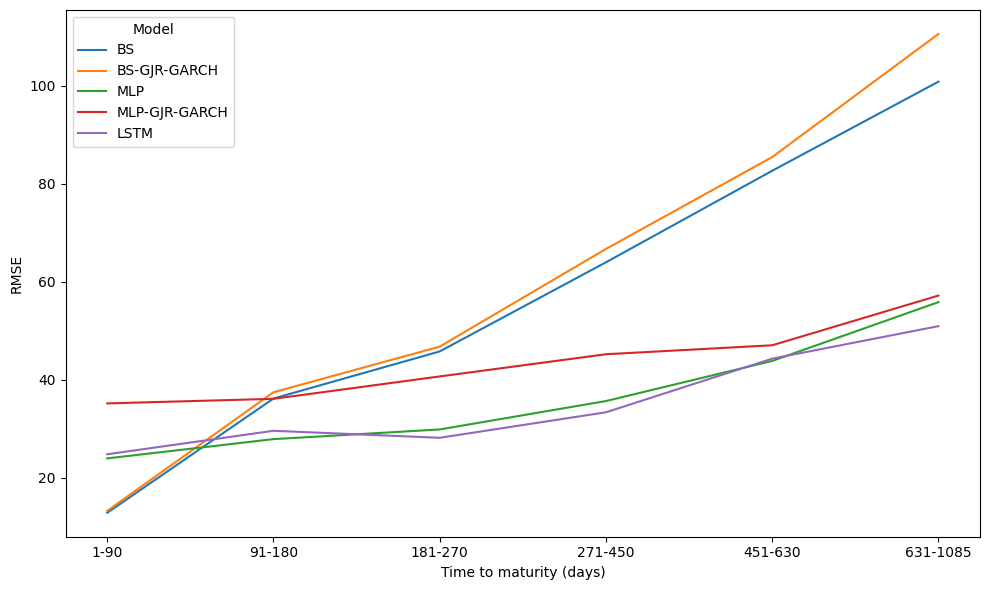

<Figure size 640x480 with 0 Axes>

In [24]:
# Assuming df_options is already loaded and contains the relevant data
models = ["BS", "BS-GJR-GARCH", "MLP", "MLP-GJR-GARCH", "LSTM"]

# Define the intervals for the "Ttl" column
bins = [1, 90, 180, 270, 450, 630, 1085]
labels = ['1-90', '91-180', '181-270', '271-450', '451-630', '631-1085']

# Create a new column 'Ttl_group' to group "Ttl" based on the intervals
df_options['Ttl_group'] = pd.cut(df_options['Ttl'], bins=bins, labels=labels, right=True)

# Initialize a DataFrame to store the losses
losses = pd.DataFrame(index=labels, columns=models)

# Calculate the loss for each model in each Ttl_group
for model in models:
    # Calculate the Mean Squared Error (MSE) loss between the model predictions and the true "Price"
    losses[model] = df_options.groupby('Ttl_group').apply(lambda x: np.sqrt(np.mean((x['Price'] - x[model])**2)))

# Plot the results
plt.figure(figsize=(10, 6))

for model in models:
    plt.plot(losses.index, losses[model], label=model)

# Customize the plot
plt.xlabel('Time to maturity (days)')
plt.ylabel('RMSE')
plt.legend(title="Model")

# Show the plot
plt.tight_layout()
plt.show()

plt.savefig('../reports/rmse_by_ttl.png')


/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/2936332155.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  losses[model] = df_options.groupby('Moneyness_group').apply(lambda x: np.sqrt(np.mean((x['Price'] - x[model])**2)))
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/2936332155.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  losses[model] = df_options.groupby('Moneyness_group').apply(lambda x: np.sqrt(np.mean((x['Price'] - x[model])**2)))
/var/folders/3t/5vvh8l5

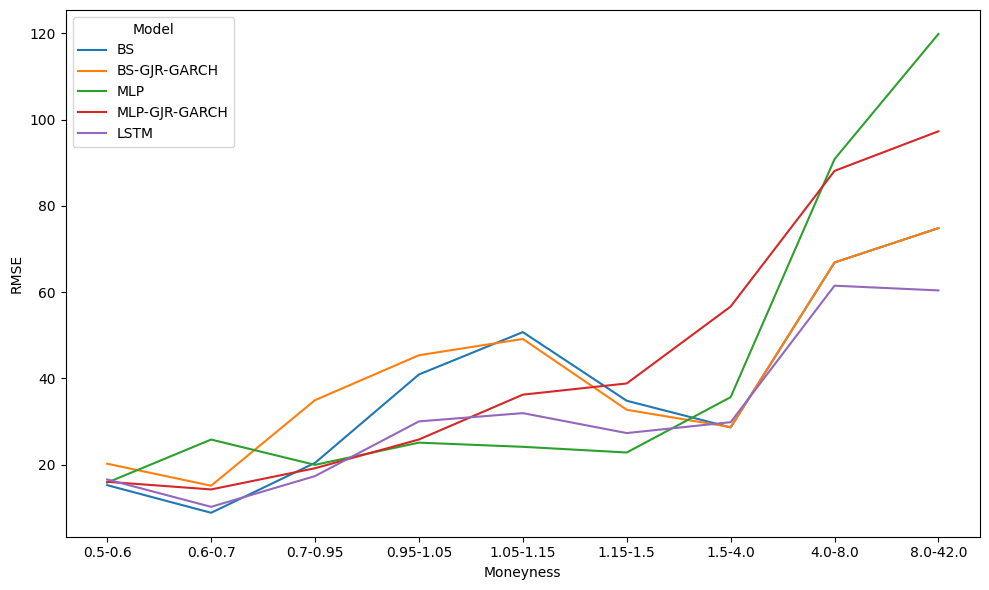

<Figure size 640x480 with 0 Axes>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_options["Moneyness"] = df_options["Underlying_last"] / df_options["Strike"]
# Assuming df_options is already loaded and contains the relevant data
models = ["BS", "BS-GJR-GARCH", "MLP", "MLP-GJR-GARCH", "LSTM"]

# Define the intervals for the "Ttl" column
bins = [0.5, 0.6, 0.7, 0.95, 1.05, 1.15, 1.5, 4.0, 8.0, 42.0]
labels = ['0.5-0.6', '0.6-0.7', '0.7-0.95', '0.95-1.05', '1.05-1.15', '1.15-1.5', '1.5-4.0', '4.0-8.0', '8.0-42.0']

# Create a new column 'Ttl_group' to group "Ttl" based on the intervals
df_options['Moneyness_group'] = pd.cut(df_options['Moneyness'], bins=bins, labels=labels, right=True)

# Initialize a DataFrame to store the losses
losses = pd.DataFrame(index=labels, columns=models)

# Calculate the loss for each model in each Ttl_group
for model in models:
    # Calculate the Mean Squared Error (MSE) loss between the model predictions and the true "Price"
    losses[model] = df_options.groupby('Moneyness_group').apply(lambda x: np.sqrt(np.mean((x['Price'] - x[model])**2)))

# Plot the results
plt.figure(figsize=(10, 6))

for model in models:
    plt.plot(losses.index, losses[model], label=model)

# Customize the plot
plt.xlabel('Moneyness')
plt.ylabel('RMSE')
plt.legend(title="Model")

# Show the plot
plt.tight_layout()
plt.show()

plt.savefig('../reports/rmse_by_moneyness.png')

/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/83861621.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  losses_by_month[model] = df_options.groupby('Month').apply(lambda x: np.sqrt(np.mean((x['Price'] - x[model])**2)))
/var/folders/3t/5vvh8l5x48s7tyvbx4b6v9xr0000gn/T/ipykernel_27685/83861621.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  losses_by_month[model] = df_options.group

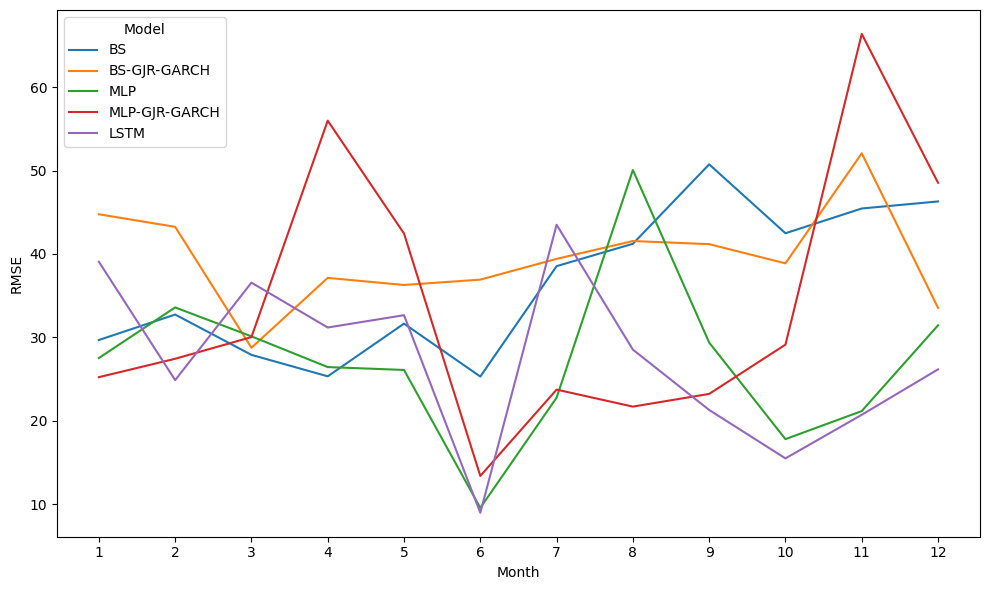

<Figure size 640x480 with 0 Axes>

In [26]:
# Assuming df_options is already loaded and contains the relevant data
models = ["BS", "BS-GJR-GARCH", "MLP", "MLP-GJR-GARCH", "LSTM"]

# Extract the month from the "Quote_date" column
df_options["Quote_date"] = pd.to_datetime(df_options["Quote_date"])
df_options['Month'] = df_options['Quote_date'].dt.month

# Initialize a DataFrame to store the losses for each model by month
months = range(1, 13)  # 1 to 12 representing the months
losses_by_month = pd.DataFrame(index=months, columns=models)

# Calculate the loss for each model in each month
for model in models:
    # Calculate the Mean Squared Error (MSE) loss between the model predictions and the true "Price"
    losses_by_month[model] = df_options.groupby('Month').apply(lambda x: np.sqrt(np.mean((x['Price'] - x[model])**2)))

# Plot the results
plt.figure(figsize=(10, 6))

for model in models:
    plt.plot(losses_by_month.index, losses_by_month[model], label=model)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('RMSE')
plt.xticks(months)
plt.legend(title="Model")

# Show the plot
plt.tight_layout()
plt.show()

plt.savefig('../reports/rmse_by_month.png')